
    Selecting a dataset   ---- I selected a "cars" dataset with some different specs.

    Visualizing the data to gain insights.  --- I plotted the data, checked for correlation, and explored the variables.

    Prepare the data for Machine Learning algorithms.  --- I put everything dataframes, and had to remove the line at [1]

    Training a Random Forest Model  --- I fit a model and checked out the Mean Square Error.

    Fine-tuning your model.

    Writing a brief report describing any insights, performance, and results.


<font size="5">Load the data</font>


In [1]:
import os
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

#Ignore a future Pandas warning.
warnings.simplefilter(action='ignore', category=FutureWarning)

housing_path = (os.getcwd() + "\\housing\\data\\")  #double-backslash those, because Windows.
data_name = "cars.csv"
data_path = (housing_path + data_name)

def load_data():
    
    cars = pd.read_csv(data_path, sep=";")
    return cars

cars = load_data()

cars = cars.drop(0)#Gets rid of an annoying useless row
print(cars.info())#Oh no! Looks like everything is an object!
display(cars.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 1 to 406
Data columns (total 9 columns):
Car             406 non-null object
MPG             406 non-null object
Cylinders       406 non-null object
Displacement    406 non-null object
Horsepower      406 non-null object
Weight          406 non-null object
Acceleration    406 non-null object
Model           406 non-null object
Origin          406 non-null object
dtypes: object(9)
memory usage: 31.7+ KB
None


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


<font size="5">Make the data useable</font>


In [2]:
#This is ugly, but it basically turns the listed column's values into either INT or FlOAT64 based on need.
cars[[
    "MPG", 
    "Cylinders", 
    "Displacement", 
    "Horsepower", 
    "Weight", 
    "Acceleration"
    ]] = cars[[
    "MPG", 
    "Cylinders", 
    "Displacement", 
    "Horsepower", 
    "Weight", 
    "Acceleration"
    ]].apply(pd.to_numeric)

#I might at some point decide to use one-hot indexing to get some info on the categorical features. 
#They don't seem relavant right now, so I'll be ignoring them. (I mean, yes a car's name will tell
#you how good it is, but that's not going to generalize at all, I think.)

cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 1 to 406
Data columns (total 9 columns):
Car             406 non-null object
MPG             406 non-null float64
Cylinders       406 non-null int64
Displacement    406 non-null float64
Horsepower      406 non-null float64
Weight          406 non-null float64
Acceleration    406 non-null float64
Model           406 non-null object
Origin          406 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 31.7+ KB


<font size="5">Look for correlations in the data</font>


                   MPG  Cylinders  Displacement  Horsepower    Weight  Acceleration
MPG           1.000000  -0.735563     -0.764277   -0.726670 -0.787510      0.424490
Cylinders    -0.735563   1.000000      0.951787    0.823467  0.895220     -0.522452
Displacement -0.764277   0.951787      1.000000    0.873758  0.932475     -0.557984
Horsepower   -0.726670   0.823467      0.873758    1.000000  0.840811     -0.682047
Weight       -0.787510   0.895220      0.932475    0.840811  1.000000     -0.430086
Acceleration  0.424490  -0.522452     -0.557984   -0.682047 -0.430086      1.000000


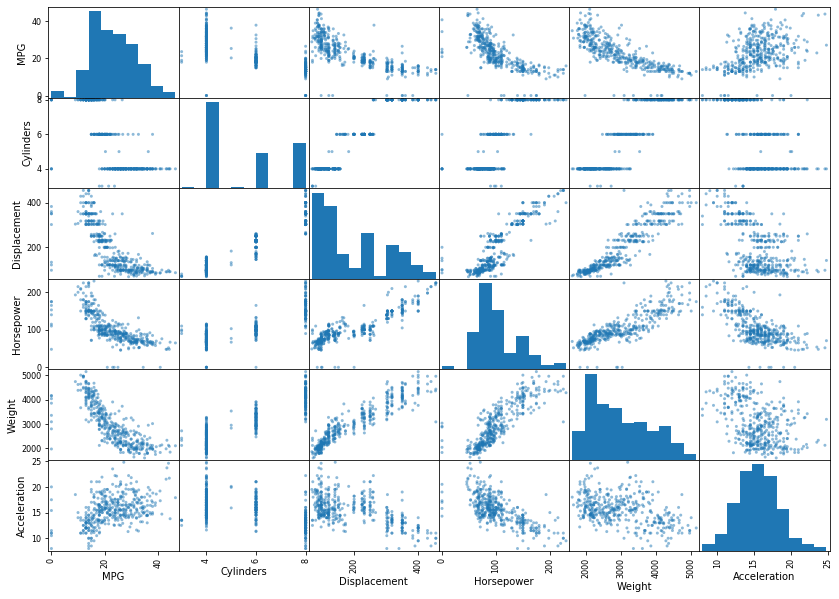

In [3]:
from pandas.plotting import scatter_matrix

correlations = cars.corr()
print(correlations.to_string())
 
features = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration"]

cars_scatter_matrix = scatter_matrix(#For some reason, assigning it to a variable keeps it from printing the array itself.
    cars[features], 
    figsize=(14, 10)
    )

<font size="5">Observations so far:</font>

Weight and Displacement seem somewhata correlataed, but in specific ranges.

Cylinder count is not really that helpful either.

The correlation between Weight and Acceleration seems to be very strong, so I'll use the Weight to predict the Acceleration of the car.
(I'll admit that there are stronger relationships in this table, but I'm choosing these two for a bit more practice.)

<font size="5">A closer look at Acceleration and Weight:</font>


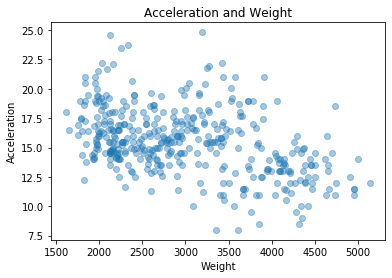

In [4]:
weight = cars["Weight"]
acceleration = cars["Acceleration"]

plot = plt.scatter(weight, acceleration, alpha=0.4)
plt.title("Acceleration and Weight")
plt.xlabel("Weight")
plt.ylabel("Acceleration")
plt.show()

<font size="5">Create model and optimize it (1)</font>

In [5]:
#This section was my first try. I can't get it to work, but that's fine because the assignment calls for 
#Random-Forest regression anyway. I'll come back to this sometime and figure out where I went wrong.

#from scipy.optimize import minimize

# I'm going with 5'th degree polynomial, because there's a decent amomunt of complexity in the data.
#def calculate_acceleration(weight, theta):
    
#    a = theta[0]
#    b = theta[1]
#    c = theta[2]
#   d = theta[3]
#    e = theta[4]
#    f = theta[5]
    
#    acceleration = a*weight**5 + b*weight**4 + c*weight**3 + d*weight**2 + e*weight + f
    
#    return acceleration

#I'm going with the RMSE cost performance measure, because I don't see a ton of really far out outliers
#def calculate_cost(x, y, theta):
    
#    cost = 0
    
#    for i in range(len(x)):
        
#        cost += (math.sqrt((calculate_acceleration(x[i], theta) - y[i])**2))
   
#    return cost

#Define the starting theta for the optimization process
#starting_theta = np.array([0, 0, 0, 0, 0, 0])

#optimize our function's coeficcients. I don't have a hyperparameter, as I'm not sure how to do that yet.
#optimized_theta = minimize(calculate_cost, starting_theta, args = [x, y])

#print(optimized_theta)

<font size="5">Split our data into training and test sets</font>

In [6]:
from sklearn.model_selection import train_test_split

#Split up the "cars" dataframe into training and test sets.
train_set, test_set = train_test_split(cars, test_size=0.2, random_state=42)
display(train_set.head())

#These are the instance and label columns that we'll use for training.
weight = train_set["Weight"]
acceleration = train_set["Acceleration"]

#This is a hacky way to make the "weight" parameter play nicely with the scikit-learn api.
#I really hope that the added indexing column isn't actually being used in any way. (Pretty sure it's not.)
#Also, it's good to note that the indexes are all out of wack because I used train_test_split.
weight = pd.DataFrame(weight)
display(weight.head())

#These are the test instance and label columns we'll use to optimize the model.
test_weight = test_set["Weight"]
test_acceleration = test_set["Acceleration"]

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
396,Oldsmobile Cutlass Ciera (diesel),38.0,6,262.0,85.0,3015.0,17.0,82,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
19,Chevrolet Monte Carlo,15.0,8,400.0,150.0,3761.0,9.5,70,US
132,Oldsmobile Omega,11.0,8,350.0,180.0,3664.0,11.0,73,US
119,Mazda RX3,18.0,3,70.0,90.0,2124.0,13.5,73,Japan


,Weight
396,3015.0
4,3433.0
19,3761.0
132,3664.0
119,2124.0


<font size="5">Create model and optimize it (2)</font>

1.5979200548329415


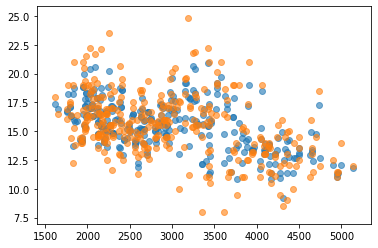

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

regressor = RandomForestRegressor()

#the first parameter has to be 2 dimensional. The second is the labels.
#right here we're fitting the regressor, which at this point feels like a bit of a black box.
fit = regressor.fit(weight, acceleration)

#Make some predictions with our regressor
predictions = regressor.predict(weight)

#Find the Mean Squared Error between our prediction vector and our label vector
mse = mean_squared_error(acceleration, predictions)
print(mse)

#Let's see how good our algorithm is doing! (It's very nonlinear.)
plt.scatter(weight, predictions, alpha = 0.6)
plt.scatter(weight, acceleration, alpha = 0.6)

<font size="5">Do some hyperparameter tuning and testing of the model!</font>

In [8]:
from sklearn.model_selection import RandomizedSearchCV






















